<a href="https://colab.research.google.com/github/Gaurav74091/Web-Scrap-Data-Project-/blob/main/Machine_learning_K_NN_With_PCA_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('machine_learning_data.csv')
df

,Age,Salary,Experience,Purchased
0,56,146748,7,1
1,46,35287,10,1
2,32,64387,12,1
3,60,38512,16,0
4,25,31342,7,1
...,...,...,...,...
995,22,104744,38,1
996,40,35109,21,1
997,27,79268,16,1
998,61,130737,33,0


<Axes: xlabel='Age', ylabel='Salary'>

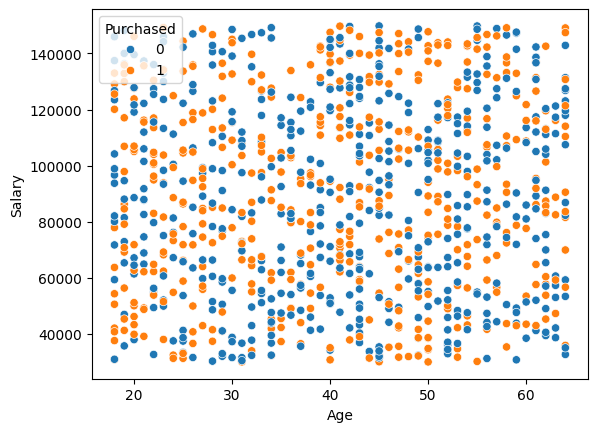

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df, x='Age', y='Salary', hue = 'Purchased')

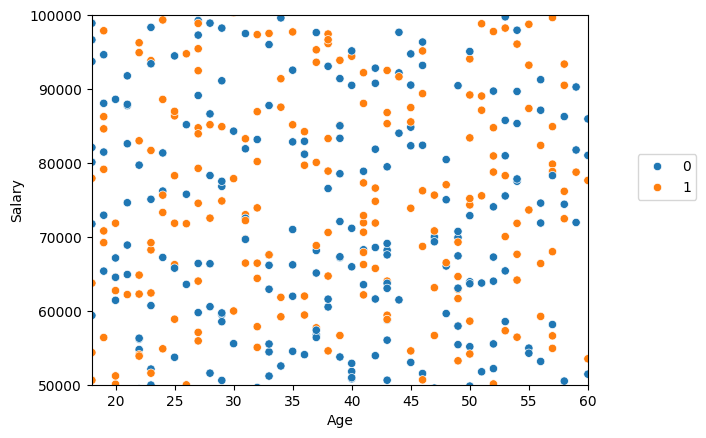

In [ ]:
#split plot xlim And Y lim
sns.scatterplot(data=df, x='Age', y='Salary', hue = 'Purchased')
plt.xlim(18,60)
plt.ylim(50000,100000)
plt.legend(loc=(1.1,0.5))

**Train Test Split And Scalling Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# prompt: data normalzation

X = df[['Age', 'Salary','Experience']]
y = df['Purchased']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=['Age', 'Salary','Experience'])

print(X_scaled_df)

          Age    Salary  Experience
0    1.112882  1.688546   -1.091773
1    0.371652 -1.548744   -0.828483
2   -0.666069 -0.703559   -0.652957
3    1.409373 -1.455077   -0.301905
4   -1.184929 -1.663323   -1.091773
..        ...       ...         ...
995 -1.407298  0.468576    1.628883
996 -0.073085 -1.553914    0.136910
997 -1.036683 -0.271353   -0.301905
998  1.483496  1.223520    1.190067
999 -1.629667 -0.116054   -1.267299

[1000 rows x 3 columns]


In [ ]:
# prompt: fit data into knn classifires

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

In [ ]:
scaler =  StandardScaler()

In [ ]:
scaled_x_train=scaler.fit_transform(X_train)
scaled_x_test=scaler.transform(X_test)

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_model.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
test_df = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
print(test_df)

            0         1         2  Purchased
0   -1.184929 -0.663333 -0.214142        1.0
1   -0.221331 -0.694439  0.926778        NaN
2   -0.517823 -1.188974  1.014541        1.0
3   -0.221331 -0.523108 -0.652957        0.0
4    1.483496  0.679146 -0.214142        NaN
..        ...       ...       ...        ...
876       NaN       NaN       NaN        1.0
597       NaN       NaN       NaN        0.0
756       NaN       NaN       NaN        1.0
870       NaN       NaN       NaN        1.0
882       NaN       NaN       NaN        0.0

[740 rows x 4 columns]


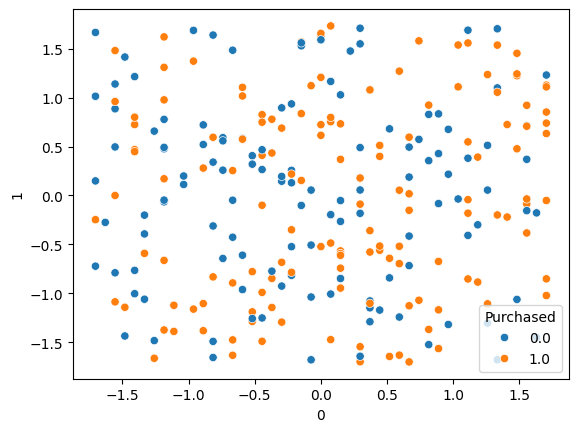

In [ ]:
sns.scatterplot(data=test_df, x=0, y=1, hue='Purchased')
plt.show()

In [ ]:
knn_model.fit(scaled_x_train, y_train)

# Now you can make predictions on the test data
y_pred = knn_model.predict(scaled_x_test)

# Display predictions
print(y_pred)

[1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0
 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0
 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0
 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1
 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0
 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.508

In [ ]:
confusion_matrix(y_test,y_pred)

array([[143, 112],
       [134, 111]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.56      0.54       255
           1       0.50      0.45      0.47       245

    accuracy                           0.51       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.51      0.51      0.51       500



**Elbow Method for Choosing Reasonable K Value**

In [ ]:
test_error_rates = []
for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)  # corrected here
    knn_model.fit(scaled_x_train, y_train)

    y_pred_test = knn_model.predict(scaled_x_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

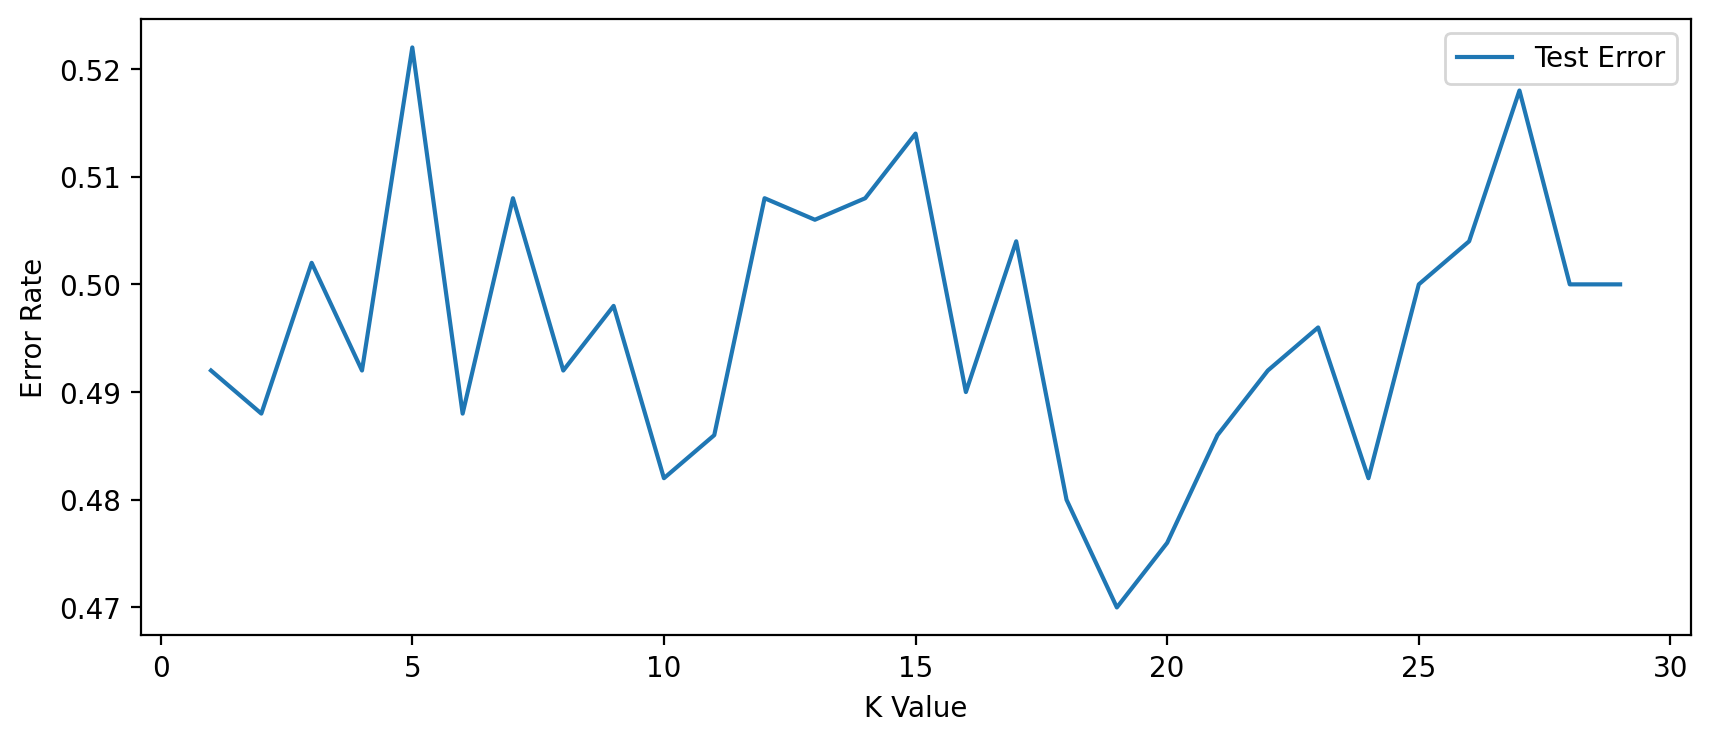

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')

**K-means with PCA¶¶**

In [ ]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

data=pd.read_csv('machine_learning_data.csv')
df=pd.DataFrame(data)
df

,Age,Salary,Experience,Purchased
0,56,146748,7,1
1,46,35287,10,1
2,32,64387,12,1
3,60,38512,16,0
4,25,31342,7,1
...,...,...,...,...
995,22,104744,38,1
996,40,35109,21,1
997,27,79268,16,1
998,61,130737,33,0


PCA(n_components=2)
(1000, 2)


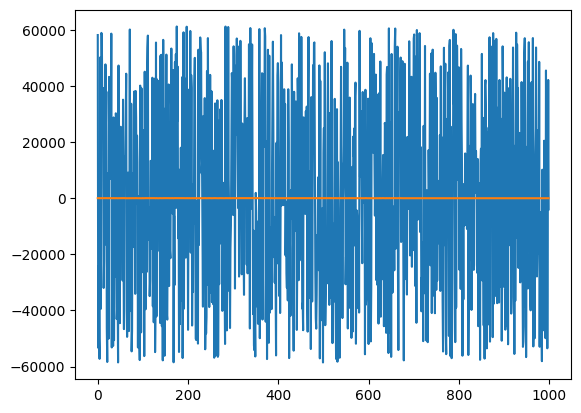

In [ ]:
pca=PCA(2)
print(pca)
#Transpose the data
df=pca.fit_transform(data)
df.shape
print(df.shape)
plt.plot(df)
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=10,random_state=0)
#fit the model
kmeans.fit(df)
#predict the lebels of clusters
label=kmeans.fit_predict(df)
print(label)
print(label.shape)

[0 2 7 2 2 9 0 5 0 0 8 3 6 5 7 8 1 6 8 6 2 2 1 9 2 6 3 9 8 3 0 2 7 1 2 8 2
 1 4 7 8 8 5 5 5 2 6 5 5 5 8 8 1 4 3 7 8 1 2 3 3 3 8 6 5 2 5 9 7 2 1 0 5 7
 8 2 2 9 1 4 8 6 8 5 6 8 4 3 3 2 4 5 2 2 6 4 2 6 9 1 9 7 8 2 6 9 5 4 7 6 0
 0 1 1 4 5 7 3 3 9 1 6 5 9 5 8 6 2 5 0 5 6 1 3 6 6 3 3 5 0 3 0 2 4 2 0 3 8
 2 3 3 3 0 5 5 4 8 6 7 8 1 7 3 0 9 9 4 6 2 4 7 6 9 0 4 0 8 6 1 9 2 1 2 7 3
 5 7 6 2 1 0 5 6 6 4 7 1 0 9 9 2 4 3 6 4 0 1 6 6 2 1 5 9 4 6 0 3 2 2 2 4 7
 2 0 1 9 3 0 0 0 9 3 1 5 8 1 7 6 2 5 2 5 6 7 0 9 1 5 4 6 4 5 6 5 3 9 5 3 2
 1 8 2 5 7 4 8 2 2 4 7 8 1 8 3 8 8 5 7 9 7 1 7 2 0 7 5 2 1 5 0 9 4 4 2 1 1
 3 6 6 3 4 0 8 6 5 8 3 0 0 0 3 4 0 7 3 9 0 3 4 7 8 9 3 1 5 8 6 3 9 3 7 8 7
 3 9 0 8 2 0 4 6 8 0 9 5 1 2 2 5 2 9 4 5 7 1 2 4 7 0 2 1 5 8 8 6 5 6 6 6 3
 0 0 5 7 3 2 9 0 9 2 0 5 7 1 1 5 9 8 0 8 7 4 7 7 7 2 3 7 6 6 6 9 5 4 5 4 0
 4 6 3 3 8 4 6 9 8 7 4 7 5 1 5 6 3 2 1 1 5 9 4 6 3 8 7 2 6 1 1 3 8 4 2 7 6
 8 7 0 7 8 6 1 0 9 5 5 2 8 3 4 4 4 8 3 8 5 2 6 0 7 4 5 9 2 6 8 5 4 6 3 0 0
 9 7 5 2 5 1 1 9 1 7 6 2 

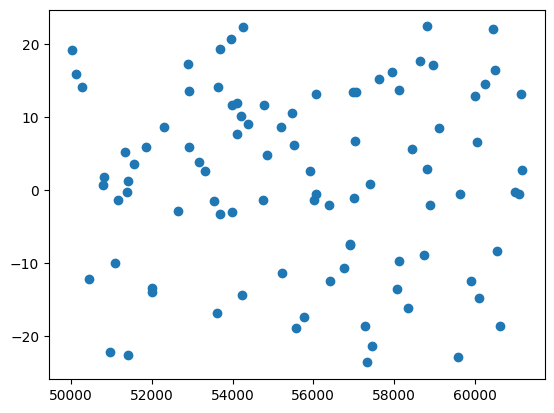

In [ ]:
#display df dataset  using scatter chart
import matplotlib.pyplot as plt
flabel=df[label==0]
# print(flabel)
plt.scatter(flabel[:,0],flabel[:,1])
plt.show()

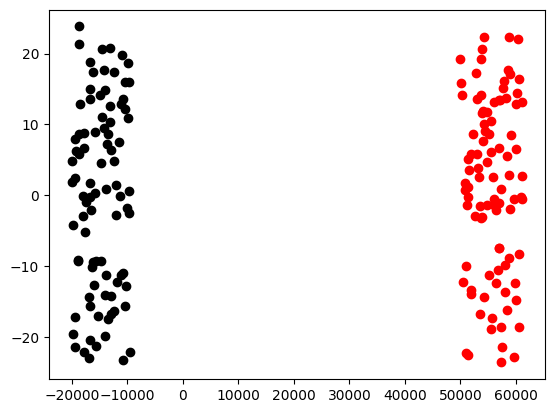

In [ ]:
flabel2=df[label==0]
flabel8=df[label==1]
plt.scatter(flabel2[:,0],flabel2[:,1],color='red')
plt.scatter(flabel8[:,0],flabel8[:,1],color='black')
plt.show()

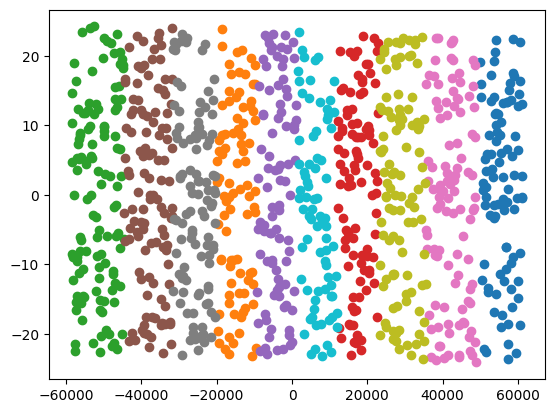

In [ ]:
#show all label using chart
for i in range(10):
  flabel=df[label==i]
  plt.scatter(flabel[:,0],flabel[:,1])
plt.show()

In [ ]:
#use centroid above chart
centroids=kmeans.cluster_centers_
print(centroids)

[[ 5.57133256e+04  1.30314878e+00]
 [-1.48107820e+04 -6.76130564e-02]
 [-5.16712574e+04  2.78379931e-01]
 [ 1.73247880e+04  8.30685729e-01]
 [-4.09452924e+03  3.06785367e-01]
 [-3.75084837e+04  7.39283300e-01]
 [ 4.23452463e+04 -1.14749463e+00]
 [-2.55661763e+04 -1.02674799e+00]
 [ 2.88244199e+04  6.08504507e-01]
 [ 6.59666668e+03 -2.29920287e+00]]


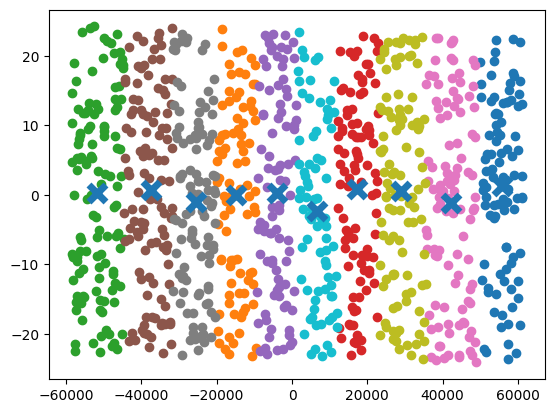

In [ ]:
#display centroid using scattter chart
for i in range(10):
  flabel=df[label==i]
  plt.scatter(flabel[:,0],flabel[:,1])
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=150,linewidths=5,zorder=10)
plt.show()